# Pick E,Q pairs for Resolution Calculation with Covariance Matrix

Instrument: ARCS
* Ei=30 meV
* Fermi chopper: 600 Hz
* T0: 120Hz

(notebook mostly prepared by Jiao Lin)

In [1]:
# some goodies
%matplotlib notebook
# %matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import mcvine.cli
from mcvine_workflow.DGS import ARCS

In [2]:
import histogram.hdf as hh, histogram as H

In [3]:
# Change this to the an appropriate directory for running yourself

workdir = '/SNS/users/p63/ORNL_public_research_tmp/MCViNE_Covmat_comparison/Find (E,Q) points to compare/'
#!mkdir -p {workdir}
%cd {workdir}

/SNS/users/p63/ORNL_public_research_tmp/MCViNE_Covmat_comparison/Find (E,Q) points to compare


## Inputs

### ARCS parameters

In [4]:
L_PM=11.61
R = 3.
L_PS=13.6
L_MS=L_PS-L_PM

In [5]:
print L_MS

1.99


### Sample

In [6]:
%%file Si.yml
name: Si
chemical_formula: Si2
lattice: 
 constants: 5.490700041, 5.490700041, 5.490700041, 90, 90, 90
 basis_vectors:
  - 5.490700041, 0, 0
  - 0, 5.490700041, 0
  - 0, 0, 5.490700041
 primitive_basis_vectors:
  - 0.0, 2.71526503565, 2.71526503565
  - 2.71526503565, 0.0, 2.71526503565
  - 2.71526503565, 2.71526503565, 0.0
excitations:
  - type: deltafunction
    hkl: 0.0, 0.0, 0.0
    E: 40.
    dE: 0.5
orientation:
 u: -1, 1, -1
 v: 2, 1, -1
shape: hollowCylinder in_radius="5./8*inch" out_radius="1.*inch" height="1.5*inch"
temperature: 100*K

Overwriting Si.yml


In [7]:
sample_yml = './Si.yml'

### ** Dynamics parameters

In [8]:
Ei = 30

In [9]:
hkl0 = np.array([0.,-0.,0.])
hkl_dir = np.array([1,0,0]) # projection

### ** Other parameters

In [11]:
# scan (this defines the range of sample rotation angles)
psimin = -5
psimax = 90.
dpsi = 1.

### Dynamic range
Use the following code to explore the dynamic range

In [12]:
from mcvine_workflow.singlextal import dynrange
from mcvine_workflow.sample import loadSampleYml
sample = loadSampleYml(sample_yml)
psilist = np.arange(psimin, psimax, 5*dpsi)
qaxis = np.arange(-100, 100, .02)

<IPython.core.display.Javascript object>


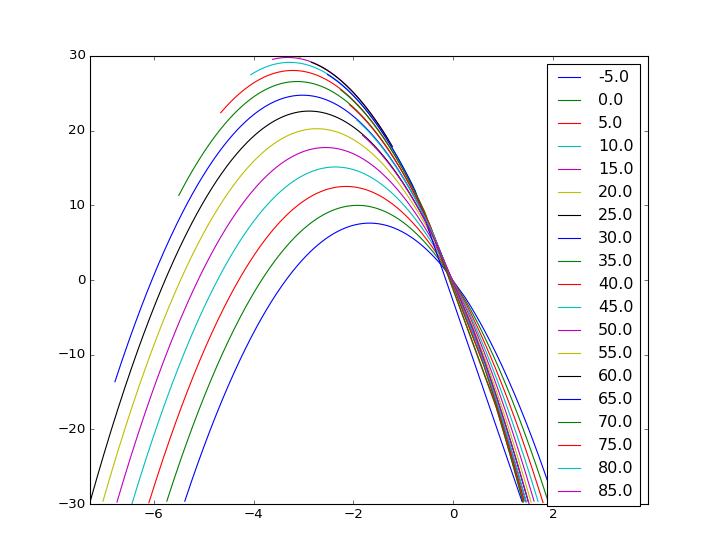

(-29.98614543772478, 29.99385796826045)

In [13]:
plt.figure(figsize=(9,7))
points_in_slice = list(dynrange.iterPointsInSlice(
        sample, psilist, Ei, hkl0, hkl_dir, qaxis,
        ARCS.scattering_angle_constraints,
        Erange=(-Ei, Ei)))
all_qs = np.concatenate([qs for _p, qs, _E in points_in_slice ])
qmin = np.min(all_qs); qmax = np.max(all_qs)

all_Es = np.concatenate([Es for _p, _q, Es in points_in_slice ])
Emin = np.min(all_Es); Emax = np.max(all_Es)

for psi, qs, Es in points_in_slice:
    plt.plot(qs, Es, label=str(psi))
    continue
    
plt.legend()
plt.xlim(qmin, qmax+(qmax-qmin)/5)
plt.ylim(Emin, Emax)

In the plot above, the vertical axis is E, the horizontal axis is Q (along the hkl_dir direction, and each curve corresponds to points measurable at a particular sample rotation angle.

In [14]:
psilist = np.arange(psimin, psimax, dpsi)
points_in_slice = list(dynrange.iterPointsInSlice(
        sample, psilist, Ei, hkl0, hkl_dir, qaxis,
        ARCS.scattering_angle_constraints,
        Erange=(-Ei, Ei)))
all_qs = np.concatenate([qs for _p, qs, _E in points_in_slice ])
qmin = np.min(all_qs); qmax = np.max(all_qs)

all_Es = np.concatenate([Es for _p, _q, Es in points_in_slice ])
Emin = np.min(all_Es); Emax = np.max(all_Es)

In [15]:
fractions = [.9, .5, .25, 1./8, 1./16, 1./32, 1./64, 1./128]
Eq_pairs = []
for f in fractions:
    E = f*Ei
    print 'E=', E
    # find maximum Es smaller than E
    max_Es_smaller = np.max(all_Es[all_Es<E])
    # find minimum Es greater than E
    min_Es_greater = np.min(all_Es[all_Es>E])
    # print E, max_Es_smaller, min_Es_greater
    Ebracket = min(max_Es_smaller, E*.99), max(min_Es_greater, E*1.01)
    # get qs
    qs = all_qs[ (all_Es>=Ebracket[0])*(all_Es<=Ebracket[1]) ]
    # print len(qs)
    while len(qs) < 10:
        Ebracket = Ebracket[0]*.95, Ebracket[1]*1.05
        qs = all_qs[ (all_Es>=Ebracket[0])*(all_Es<=Ebracket[1]) ]
    print "Ebracket=", Ebracket, 'number of qs=', len(qs)
    Eq_pairs.append( (E, np.mean(qs)))
Eq_pairs = np.array(Eq_pairs)

E= 27.0
Ebracket= (26.73, 27.27) number of qs= 275
E= 15.0
Ebracket= (14.85, 15.15) number of qs= 192
E= 7.5
Ebracket= (7.425, 7.575) number of qs= 91
E= 3.75
Ebracket= (3.7125, 3.7875) number of qs= 25
E= 1.875
Ebracket= (1.7634374999999998, 1.9884375) number of qs= 40
E= 0.9375
Ebracket= (0.8817187499999999, 0.99421875) number of qs= 11
E= 0.46875
Ebracket= (0.44085937499999994, 0.49735648262163556) number of qs= 11
E= 0.234375
Ebracket= (0.2041462002206724, 0.26726847105780949) number of qs= 11


In [16]:
print Ei
print Eq_pairs

30
[[ 27.          -2.90494545]
 [ 15.          -2.17958333]
 [  7.5         -1.90417582]
 [  3.75        -2.712     ]
 [  1.875       -3.915     ]
 [  0.9375      -4.68      ]
 [  0.46875     -4.58363636]
 [  0.234375    -5.07636364]]
